# Personal Project: A look into Tight-binding method (TBM) with 2d squares, graphene and silicon

# Introduction to TBM

Tight-binding method is a mathematical model often used in condensed matter physics in determining the energy band structure of a certain solid. Previous models such as the nearly-free electron model aren't enough to encapsulate properties of the material which is where TBM comes in. TBM uses the premise that the electron is tightly bounded to its original orbital wavefunction and neighbouring orbitals. 

## Linear Combination of Atomic Orbitas (LCAO)
The mathematical model for the blueprint of TBM is called the LCAO theory, where the general electron wavefunction $\Psi$ is the linear sum of the individual orbital wavefunctions $\phi_i$ in the lattice chain.

\begin{equation}
   \Psi(\bf{r}) = \sum_{\bf{R}} e^{i\bf{k} \cdot \bf{R}}c_m \phi_i(\bf{r} - \bf{R})
\end{equation}


The atomic orbital wavefunctions $\phi$ follows bloch function such that it satisfies the periodic boundary conditions impose by the translational symmetry of the crystal. The term inside the summation sign tells us the **wavefunction  of electron inside a primitive unit cell or any repeating unit**. This should therefore contain information of **how many atoms are in the basis unit as well as how many types of orbitals does it contain**. $\bf{R}$ refers to the lattice vectors in a crystal, which varies depending on the geometry of lattice used.


## applying the hamiltonian

The inner product of the hamiltonian operator outputs the associated energy when we apply it to the wavefunction $\phi_i$. By taking the inner product with its own wavefunction, it outputs energy $E_0$ which is the energy the electron is tightly bounded to its own atom, also called **on-site energy**. If we take the inner product of the hamiltonian with its neighbouring atom $\phi$, the **hopping energy** $t$ is collected, which describes the energy it requires for the electron to hop to the other atoms. Usually, a phase is also acquired as the electron travels to a neighbouring unit cell. $t$ is usually a negative quantity.

When we start looking at more complex problems that involve multitudes of the orbital types and multi-atom basis, the problem can be simplified by turning it into a matrix function, where we consider the hamiltonian matrix with the listed energy elements. Diagonalising the matrix will give us the eigenenergies of our crystal lattice for a specific $k$ value. So by considering the brillouin zone of our crystal structure, we can collect all the possible eigenenergies and plot them out to form the energy band structure of solid. Producing the energy band is a useful insight in condensed matter physics research as it can inform us the band gap for a solid and other unique characteristics such as dirac cones found in graphene. It also gives scientists a clue behind the electrical conductivity characteristics of the solid.

In [12]:
import numpy as np
import cmath as cm
import matplotlib.pyplot as plt
import scipy.constants as sc
from mpl_toolkits.mplot3d import Axes3D
from scipy.sparse import diags
%matplotlib notebook

# Simple chain of 1S orbitals

Here, we first consider a simple 1d case of atoms seperated by distance a. The basis is one atom with a 1s orbital. From here, we can deduce that there is really one eigenenergy and the hopping energy is simply $t(e^{ika} + e^{-ika}) = 2tcos(ka)$

In [13]:
def schain_formula(alpha, beta, k, lattice_constant):
    one_s_energy = alpha + 2 * beta * np.cos(k * lattice_constant)
    return one_s_energy

def get_bz_bound(lattice_constant):
    upper_bz_bound = np.pi/lattice_constant
    lower_bz_bound = -upper_bz_bound
    return lower_bz_bound, upper_bz_bound



In [14]:
E_1s = -13.6
E_1sa = -10
E_1s_overlap = -7


<IPython.core.display.Javascript object>


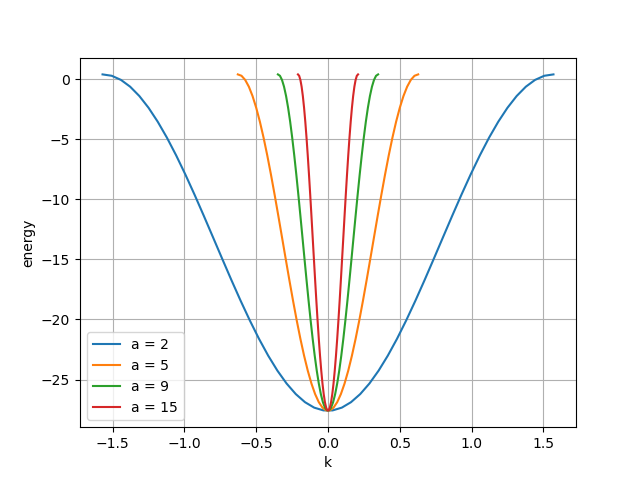

In [15]:
lattice_constant = [2, 5, 9, 15]

fig = plt.figure()
for l in lattice_constant:
    lbz, ubz = get_bz_bound(l)
    k = np.linspace(lbz, ubz)
    bond_energy = schain_formula(E_1s, E_1s_overlap, k, l)
    plt.plot(k, bond_energy, label = f'a = {l}')

plt.xlabel('k')
plt.ylabel('energy')
plt.legend()
plt.grid()
plt.show()

# 1D chain of with 2 atoms per unit cell (with 1s bonding)

When we extend our basis to 2 atoms, we must now consider two orbital wavefunctions $\phi_sa$ and $\phi_sb$, where they only hop to their alternative counterparts. In the case of two atoms, we now have two different bands formed by two different eigenenergies. The band with the higher energy is called the conduction band where the electrons are antibonding while the one with the lower energy is called the valence band (electrons perform the bonding). Usually, the bands are seperated by an energy gap due to the different nuclear charges in different atoms.

\begin{bmatrix}
E_0 & 2t \cos{ka} \\
2t \cos{ka} & E_0 
\end{bmatrix}

The hamiltonian matrix **in the basis of our orbital functions** can be written as above. By solving the eigenvalue equation, we get the eigenenergies for our band diagram.

<IPython.core.display.Javascript object>


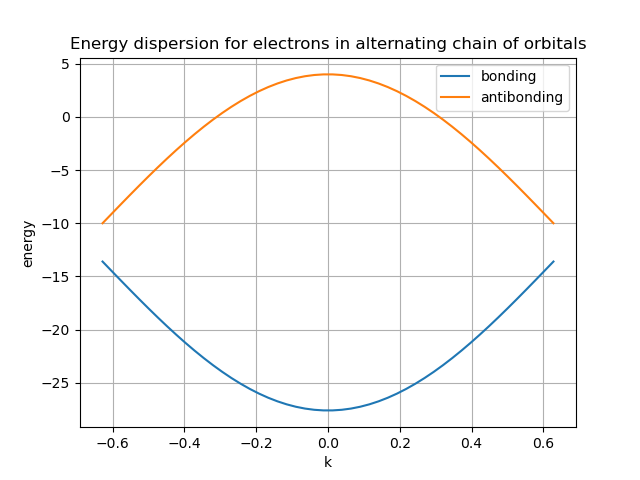

In [16]:
def alt_chain_formula(alpha, beta, k, lattice_constant, bond_value):
    '''
    bond_value: determines if it is bonding (0) or antibonding (1)
    '''
    if bond_value == 0:
        energy = alpha + 2 * beta * np.cos(k * lattice_constant / 2)
    else:
        energy = alpha - 2 * beta * np.cos(k * lattice_constant / 2)
    return energy

lattice_constant = 5
lbz, ubz = get_bz_bound(lattice_constant)
k = np.linspace(lbz, ubz)
bond_energy = alt_chain_formula(E_1s, E_1s_overlap, k, lattice_constant, 0)
antibond_energy = alt_chain_formula(E_1sa, E_1s_overlap, k, lattice_constant, 1)

fig = plt.figure()
plt.plot(k, bond_energy, label = 'bonding')
plt.plot(k, antibond_energy, label = 'antibonding')
plt.xlabel('k')
plt.ylabel('energy')
plt.legend()
plt.grid()
plt.title('Energy dispersion for electrons in alternating chain of orbitals')
plt.show()

# Determining the eigenenergies of 1s alternating chain through diagonalization method

In [17]:
hop_1ds = 7.0

In [18]:
def construct_matrix(energy_array, orbital_no, datasize):
    '''
    constructs any type of matrix based on the information input and size of the data 
    '''
    matrix = energy_array.reshape((orbital_no, orbital_no))
    matrices = np.array([matrix] * datasize, dtype = 'complex128')
    return matrices

def hopping_matrix3(matrices, k, neighbour_distance):
    '''
    newer version in constructing matrix that comprises only of hopping terms
    '''
    phase_terms = 2 * np.cos(k*neighbour_distance)
    for index, matrix in enumerate(matrices):
        matrices[index] = matrix * phase_terms[index]
    return matrices

def hopping_matrix(hopping_array, k, atom_no, a, datasize):
    '''
    old version in constructing matrix that comprises only of hopping terms
    '''
    matrix = hopping_array.reshape((atom_no, atom_no))
    term =  2 * np.cos(k*a/2)
    matrices = np.array([matrix] * datasize)
    for index, matrix in enumerate(matrices):
        matrices[index] = matrix * term[index]
    return matrices

def obtain_eigenenergies(on_site_matrix, hopping_matrix):
    '''
    collects the eigenenergies collected by the linalg program
    '''
    hamiltonian = on_site_matrix + hopping_matrix
    eigh = np.linalg.eig(hamiltonian)[0]
    return eigh

k = np.linspace(lbz, ubz)
on = np.array([E_1s, 0, 0, E_1sa])
on_site_matrices = construct_matrix(on, 2, len(k))
hop = np.array([-hop_1ds, 0, 0, +hop_1ds])
hopping_matrices = construct_matrix(hop, 2, len(k))
hopping_matrices = hopping_matrix3(hopping_matrices, k, lattice_constant/2)
eigh = obtain_eigenenergies(on_site_matrices, hopping_matrices)

<IPython.core.display.Javascript object>


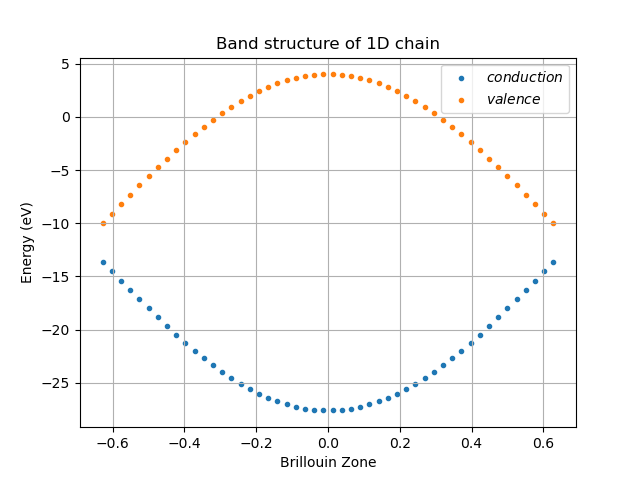

/Users/chanheichunthomas/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


In [19]:
bottom_band = eigh[:,0]
top_band = eigh[:,1]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(k, bottom_band, marker = '.', label = r'$conduction$')
ax.scatter(k, top_band, marker = '.', label = r'$valence$')
ax.set_title('Band structure of 1D chain')
ax.set_ylabel('Energy (eV)')
ax.set_xlabel('Brillouin Zone')
ax.legend()
ax.grid()
plt.show()

This graph matches what we exactly get from the analytical calculation of the band structure. The eigenenergies for different k constitute together to form the overall band structure, where each eigenvalue at the same k corresponds to the different state this electron can take. In this case, the electron can take on the bonding energy ($\sigma$ bond) or the antibonding energy ($\pi$ bond).

## Taking into account of interhopping of electrons between different orbital (but no hopping among its own orbitals)

In [20]:
# say we set the energy for electron to jump from px to py orbital as a parameter
x_y_bond = [-10, -5, -3]
bottom_data = []
top_data = []
for value in x_y_bond:
    hop = np.array([-hop_1ds, value, value, hop_1ds])
    b = hopping_matrix(hop, k, 2, lattice_constant, len(k))
    eigh = obtain_eigenenergies(on_site_matrices, b)
    bottom_band = eigh[:, 0]
    top_band = eigh[:, 1]
    bottom_data.append(bottom_band)
    top_data.append(top_band)

<IPython.core.display.Javascript object>


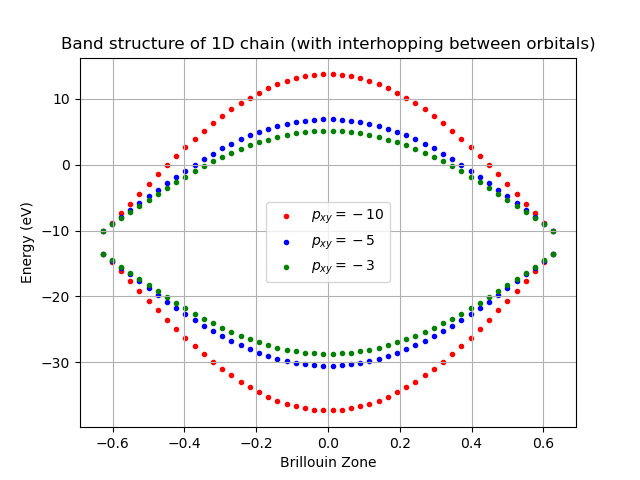

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(k, bottom_data[0], marker = '.', color = 'r', label = r'$p_{xy} = -10$')
ax.scatter(k, top_data[0], marker = '.', color = 'r')
ax.scatter(k, bottom_data[1], marker = '.', color = 'b', label = r'$p_{xy} = -5$' )
ax.scatter(k, top_data[1], marker = '.', color = 'b')
ax.scatter(k, bottom_data[2], marker = '.', color = 'g', label = r'$p_{xy} = -3$')
ax.scatter(k, top_data[2], marker = '.', color = 'g')
ax.set_title('Band structure of 1D chain (with interhopping between orbitals)')
ax.set_ylabel('Energy (eV)')
ax.set_xlabel('Brillouin Zone')
ax.legend()
ax.grid()
plt.show()

Observation: by decreasing the interhopping orbital energy, The peaks and curvature of the band structure increases. The lowest energy the electron can take depends on how stable it is in its own orbital, so the lower the interhopping energy is, the more bounded it is towards the atom. Moreover, the effective mass of an electron is inversly proportional to the curvature of the band, so the inertia of the electron becomes smaller when there is interhopping between its orbital.

# Influence from next-nearest neighbour

normally, the assumption in tight-binding model is we only consider the nearest neighbours but in this case for 1d chain, we like to consider the effect from the next-nearest neighbour. 

<IPython.core.display.Javascript object>


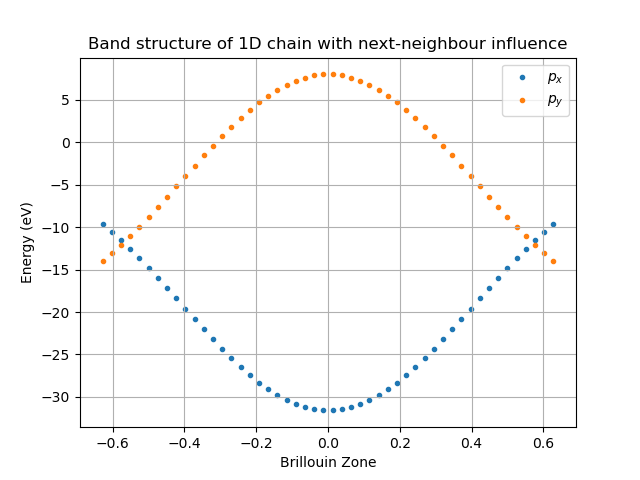

In [22]:
next_neighbour_hop = np.array([-2.0, 0, 0, 2.0])
nn_matrix = construct_matrix(next_neighbour_hop, 2, len(k))
nn_matrices = hopping_matrix3(nn_matrix, k, lattice_constant)
m = on_site_matrices + hopping_matrices
eig_e = obtain_eigenenergies(m, nn_matrices)

px_band = eig_e[:,0]
py_band = eig_e[:,1]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(k, px_band, marker = '.', label = r'$p_x$')
ax.scatter(k, py_band, marker = '.', label = r'$p_y$')
ax.set_title('Band structure of 1D chain with next-neighbour influence')
ax.set_ylabel('Energy (eV)')
ax.set_xlabel('Brillouin Zone')
ax.legend()
ax.grid()
plt.show()

Discovery: The top energy band and the lower band 'shifted' with more overlap with one another.

# 2D: square lattice

As we step into the 2D case, we must now consider the lattice vectors of the general structure. Knowing them allows us to construct the brillouin zone by math and gives us the minimum set of k-points we need to know the energy band. Most 2D bravais lattices are self-dual, where their brillouin zone has the same shape as their current lattice, but **the reciprocal lattice vectors are different compared to the original lattice vectors**.

The brillouin zone of a 2d square lattice is another square lattice as well, with a total length of $\dfrac{2\pi}{a}$ centred on the origin. Therefore, we can write the wave-vector $\bf{k}$ as $(k_x, k_y) = ([1,0], [0,1])$. The energy band is also highly symmetric along certain lines. The points connecting these lines are called the critical points which are denoted by $\Gamma, X, M$.

Here, each atom has **four nearest neighbours with two lying on both ends of one-side**. The hopping is similiar to that of a 1d lattice only this time we must consider both in the x and y direction. The hopping factor $f_k$ is then shown in equation 
\begin{equation}
f_k = e^{ik_xa} + e^{-ik_xa} + e^{ik_ya} + e^{-ik_ya} = 2 \cos{k_xa} + 2 \cos{k_ya}
\end{equation}


In [23]:
def square_bonding_formula(alpha, beta, kx, ky, lattice_constant):
    '''
    analytical formula for the bond energy terms in square lattice array
    '''
    cos_term = np.cos(kx * lattice_constant) + np.cos(ky * lattice_constant)
    bond_energy = alpha + 2 * beta * cos_term
    return bond_energy


lattice_constant = 5

<IPython.core.display.Javascript object>


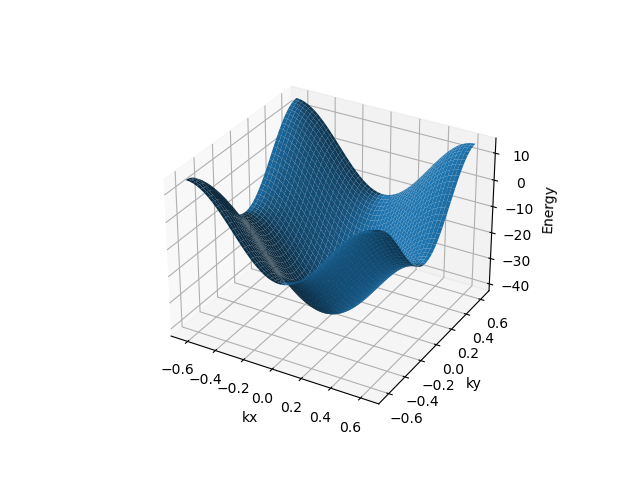

In [24]:
lbz, ubz = get_bz_bound(lattice_constant)
x = np.linspace(lbz, ubz)
y = np.linspace(lbz, ubz)
X, Y = np.meshgrid(x, y)
bond_energy = square_bonding_formula(E_1s, E_1s_overlap, X, Y, lattice_constant)

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, bond_energy)
ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('Energy')
plt.show()

The values of k can be done by using the help of np.meshgrid

In [25]:
def twodim_bz(lattice_constant):
    '''
    constructs the brillouin zone coordinates using np.meshgrid
    '''
    bzb = np.pi/lattice_constant
    kx = np.linspace(-bzb, bzb)
    ky = np.linspace(-bzb, bzb)
    X, Y = np.meshgrid(kx, ky)
    return X, Y

def square_hopping_energy(X, Y, d_nn):
    '''
    calculates the cos factor for the hopping energy matrix
    '''
    dispersion_calc = 2 * (np.cos(X*d_nn) + np.cos(Y*d_nn))
    return dispersion_calc


def twodim_constructmatrix(element_1, element_2, element3, element4, size):
    '''
    construct the list of matrices for 2d brillouin zones
    '''
    array = np.array([1.,1.,1.,1.])
    # first create an array of matrixes of 1 to create as a blueprint
    matrices = construct_matrix(array, 2, size*size)
    # for the meshgrids inputted, flatten them into a 1d array for easy indexing
    element_1_flatten = element_1.ravel()
    element_2_flatten = element_2.ravel()
    no = size*size
    # for each matching index, create an array that is used to construct back the matrix element
    for i in range(no):
        matrix = np.array([element_1_flatten[i], element3, element4, element_2_flatten[i]]).reshape((2,2))
        matrices[i] = matrix
    return matrices

def twodim_eigenergy(energy_matrices, size):
    square_energies = np.linalg.eig(energy_matrices)[0]
    px_energy = square_energies[:,0]
    py_energy = square_energies[:,1]
    px_matrix = px_energy.reshape((size, size))
    py_matrix = py_energy.reshape((size,size))
    return px_matrix, py_matrix



In [26]:
lattice_constant = 5
t_sigma = -7
t_pi = 7
d_nn = lattice_constant
X, Y = twodim_bz(lattice_constant)
dispersion = square_hopping_energy(X, Y, d_nn)
t_sigma_hop = t_sigma * dispersion
t_pi_hop = t_pi * dispersion

size = len(t_sigma_hop)
on_site_energy = np.ones((size,size)) * E_1s
element_1 = on_site_energy + t_sigma_hop
element_2 = on_site_energy + t_pi_hop

energy_matrices = twodim_constructmatrix(element_1, element_2, 0, 0, size)

px_matrix, py_matrix = twodim_eigenergy(energy_matrices, size)

# General function for giving the critical points of the brillouin zone

The following code written are used to extract only necessary information of kx, ky along the symmetry lines to reflect the symmetry of the energy band diagram. This is common practice in condensed matter physics where it is easier to visualize with what's going on.

In [27]:
def element_filter(element_list, size):
    '''
    filters the inputted list of elements for the matrix and ensures they are all ndarray with the same 1d lens size
    '''
    data = element_list
    for index, element in enumerate(element_list):
        if isinstance(element, float) == True:
            new_element = np.ones(size) * element
        else:
            new_element = element.ravel()
        data[index] = new_element
    return data

def twodim_constructmatrix1(element_list, size):
    '''
    construct the list of matrices for 2d brillouin zones. This is used in conjunction with element_filter()
    '''
    array = np.array([1.,1.,1.,1.])
    # first create an array of matrixes of 1 to create as a blueprint
    matrices = construct_matrix(array, 2, size)
    element1, element2, element3, element4 = element_list
    # for the meshgrids inputted, flatten them into a 1d array for easy indexing
    # for each matching index, create an array that is used to construct back the matrix element
    for i in range(size):
        matrix = np.array([element1[i], element2[i], element3[i], element4[i]], dtype = "complex128").reshape((2,2))
        matrices[i] = matrix
    return matrices


def critical_points_data(critical_pointA, critical_pointB, data_no):
    '''
    outputs array of data points stored in tuples along different lines connecting the critical points in the 
    reciprocal space. There are three tuples stored for three critical points
    
    PARAMETERS
    ==========
    critical_point1, critical_point2: vectors (np.array)
    '''
    # creating points of data between the points
    origin = np.array([0,0])
    OA_x = np.linspace(origin[0], critical_pointA[0], data_no)
    OA_y = np.linspace(origin[1], critical_pointA[1], data_no)
    AB_x = np.linspace(critical_pointA[0], critical_pointB[0], data_no)
    AB_y = np.linspace(critical_pointA[1], critical_pointB[1], data_no)
    BO_x = np.linspace(critical_pointB[0], origin[0], data_no)
    BO_y = np.linspace(critical_pointB[1], origin[1],  data_no)
    
    # next, using meshgrid and np.diag to actually extract the varying values along the line
    OA_X, OA_Y = np.meshgrid(OA_x, OA_y)
    AB_X, AB_Y = np.meshgrid(AB_x, AB_y)
    BO_X, BO_Y = np.meshgrid(BO_x, BO_y)
    OA_kx = np.diag(OA_X)
    OA_ky = np.diag(OA_Y)
    AB_kx = np.diag(AB_X)
    AB_ky = np.diag(AB_Y)
    BO_kx = np.diag(BO_X)
    BO_ky = np.diag(BO_Y)
    
    return (OA_kx, OA_ky), (AB_kx, AB_ky), (BO_kx, BO_ky)

def critical_points_energy(critpoint_coord, on_site_energy, hopping_func):
    '''
    calculates and returns the eigenenergies of one orbital based on the coordinates between the 
    critical points for their respective structural hopping function.
    
    hopping_func is expected to take two arguments: the x-coordinate and y-coordinate of the recipricol space
    '''
    orb_energy1 = [0, 0, 0]
    orb_energy2 = [0, 0, 0]
    for index, coord_pair in enumerate(critpoint_coord):
        size = len(coord_pair[0])
        orb_a = hopping_func(coord_pair[0], coord_pair[1])
        orb_b = np.conjugate(orb_a)
        matrix_element = [on_site_energy[0], orb_a, orb_b, on_site_energy[1]]
        matrix = element_filter(matrix_element, size)
        hamiltonian = twodim_constructmatrix1(matrix, size)
        eigenenergy = np.linalg.eigh(hamiltonian)[0]
        orb_energy1[index] = eigenenergy[:, 0]
        orb_energy2[index] = eigenenergy[:, 1]
    orb_energy1 = np.concatenate(orb_energy1)
    orb_energy2 = np.concatenate(orb_energy2)
    return orb_energy1, orb_energy2

def plot_critical_data(energy1, energy2, data_no):
    K_point = data_no
    M_point = data_no * 2
    
    x = np.arange(0, len(energy1), 1)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, energy1, label = 'valence band')
    ax.plot(x, energy2, label = 'conduction band')
    ax.axvline(M_point, dashes = [2,2], color = 'black')
    ax.axvline(K_point, dashes = [2,2], color = 'red')
    ax.set_xticks([K_point, M_point])
    ax.set_xticklabels(['$K$', '$M$'])
    ax.set_ylabel('Energy (eV)')
    ax.legend()
    plt.show()
    
    return None


# The same lattice structure but with two atoms a and b

Let's modify our last example with a new basis, a basis of two different atoms with the same p_z orbital. Unfortunately, our energy band structure will become lot different from the simple case of one atom basis. This is because the geometry of the whole structure changes so we need to **reconsider the nearest neighbours and hamiltonian matrix** for our model. As you can tell, this process is quite repetitive in TBM (also quite annoying) in order to get an accurate energy structure.

If we set the origin on one unit cell, the nearest neighbors are obtained by acquiring a phase shift of $e^{ikx_a}, e^{ik_ya}, e^{i(k_xa + k_ya)}$. The phase/hopping factor and hamiltonian then becomes 
\begin{equation}
f_k = 1 + e^{ikx_a} + e^{ik_ya} +e^{i(k_xa + k_ya)}
\end{equation}

\begin{bmatrix}
E_a & tf_k\\
tf^{\ast}_k & E_b
\end{bmatrix}

To clarify, $f^{\ast}_k$ is the complex conjugate of the phase factor. This is to ensure that the hamiltonian stays hermitian. (This is also true when you consider the same method in finding the nearest neighbour for the other atom in the basis). In addition, note that the energy terms in the diagonal are different, as due to the different atoms. This difference is what creates the band gap as seen in our energy band.

<IPython.core.display.Javascript object>


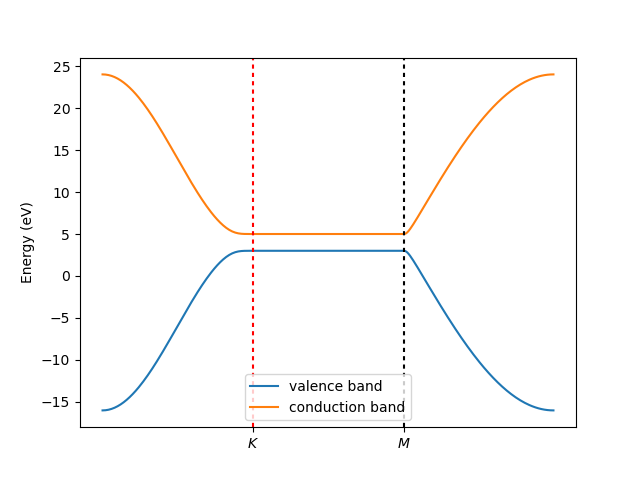

In [28]:
SQHOP = -5
def sqhop(kx, ky):
    #phase = 4 * np.cos(kx*lattice_constant + ky*lattice_constant) * np.cos(kx*lattice_constant + ky*lattice_constant)
    phase1 = np.exp(1j * kx * lattice_constant)
    phase2 = np.exp(1j * ky * lattice_constant)
    phase3 = np.exp(1j * (kx*lattice_constant + ky*lattice_constant))
    energy = SQHOP * (1 + phase1 + phase2 + phase3)
    return energy

data_no = 100
bzb = np.pi/lattice_constant
on_site = [3., 5.]
v1 = bzb * np.array([1, 1])
v2 = bzb * np.array([1, 0])
data = critical_points_data(v1, v2, data_no)
eigenergy1, eigenergy2 = critical_points_energy(data, on_site, sqhop)
plot_critical_data(eigenergy1, eigenergy2, data_no)

Note how the two bands are seperated by a space. This is the band gap in our system. Electrons occupying the lower band will not be able to reach to the conduction band unless they have sufficient energy overcoming the band gap. Also note how this band gap is smallest at the edge of the brillouin zone. This is reasonable considering the electron's momentum is at its max there (high k_x, k_y) and hence its energy. This aligns what we expect when only electrons near the fermi energy level can jump to the next band.

<IPython.core.display.Javascript object>


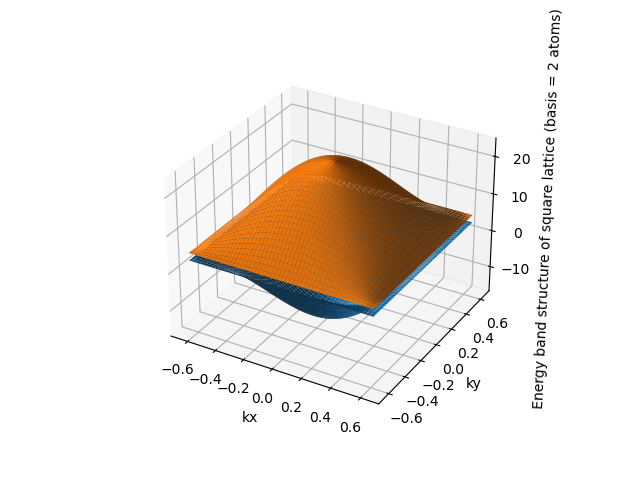

In [29]:
# get the full picture of the energy band
k = np.linspace(-bzb, bzb)
X, Y = np.meshgrid(k, k)
size = len(X) * len(Y)
sa_hop = sqhop(X, Y)
sb_hop = np.conjugate(sa_hop)
element_data = [on_site[0], sa_hop, sb_hop, on_site[1]]
element_data = element_filter(element_data, size)
hamiltonian = twodim_constructmatrix1(element_data, size)
eigenenergy = np.linalg.eigh(hamiltonian)[0]
band0 = eigenenergy[:, 0].reshape((len(X), len(Y)))
band1 = eigenenergy[:, 1].reshape((len(X), len(Y)))

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, band0)
ax.plot_surface(X, Y, band1)
ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('Energy band structure of square lattice (basis = 2 atoms)')
plt.show()

## Graphene

Another example in a 2D lattice is graphene, and it is quite the popular subject for physicist in the field. Literally, the only thing that makes graphene unique compared to other materials is that **it has two same atoms as a basis in a hexagonal lattice**, that's it. But it is also this fact that what gives graphene its strange and robust properties as will be seen in its energy band.

# Writting down the lattice vectors of the hexagonal structure

We choose our lattice vectors for our hexagonal structure $\bf{a_1}, \bf{a_2}$ are $a(\sqrt(3)/2, 1/2), a(\sqrt(3)/2, -1/2)$ respectively. By converting them into recipricol lattice vectors for the brillouin zone, we find that the BZ is equivalently a hexagonal, except it's rotated 90 degrees. Using one unit cell as its basis,
we find the nearest neighbours for one atom are within its own unit cell, one translated by $\bf{a_1}$ and one translated by $\bf{a_2}$.

\begin{equation}
f_k = 1 + e^{i\bf{k} \dot \bf{a_1}} + e^{i\bf{k} \dot \bf{a_2}}
\end{equation}

We can then write our hamiltonian matrix as follows:

\begin{bmatrix}
E & tf_k\\
tf^{\ast}_k & -E
\end{bmatrix}

$E$ is just the on-site energy of an electron found within its own orbital. The diagonal terms are unique based on the geometry of hexagonal lattice. In this case, E = 0 for graphene.

In [30]:
graphene_latcon = 2
g_lv1 = np.array([np.sqrt(3)/2, 1/2]) * graphene_latcon
g_lv2 = np.array([np.sqrt(3)/2, -1/2]) * graphene_latcon


#nearest neighboring distance
d_nnv = (g_lv1 + g_lv2) * 1/3 
d_nn = d_nnv[0]
V_1 = g_lv1
V_2 = g_lv2 
GRAPHENE_HOPPING_ENERGY = -2.8 

# ONLY CONSIDER PHASE WHEN IT MOVES TO A DIFFERENT UNIT CELL
def hexagonal_hopping(kx, ky):
    #X, Y = np.meshgrid(kx, ky)
    nearest_neighbour1 = kx * V_1[0] + ky * V_1[1]
    nearest_neighbour2 = kx * V_2[0] + ky * V_2[1]
    phase = 1 + np.exp(1j*nearest_neighbour1) + np.exp(1j * nearest_neighbour2)
    hopping_term = GRAPHENE_HOPPING_ENERGY * phase
    return hopping_term

In [31]:
# note that this time the brillouin zone boundary for graphene is not pi/a, because this time the brillouin zone is a hexagonal 
# we use a range of about 2pi/a
bzb = 2 * np.pi/graphene_latcon
k = np.linspace(-bzb, bzb, 100)
X, Y = np.meshgrid(k, k)
pza_hopping = hexagonal_hopping(X, Y)
pzb_hopping = np.conjugate(pza_hopping)
GRAPHENE_ONSITE = 0.    
size = 100 * 100
graphene_elementlist = [GRAPHENE_ONSITE, pza_hopping, pzb_hopping, GRAPHENE_ONSITE]
graphene_elementlist = element_filter(graphene_elementlist, size)
graphene_hamiltonian = twodim_constructmatrix1(graphene_elementlist, size)

<IPython.core.display.Javascript object>


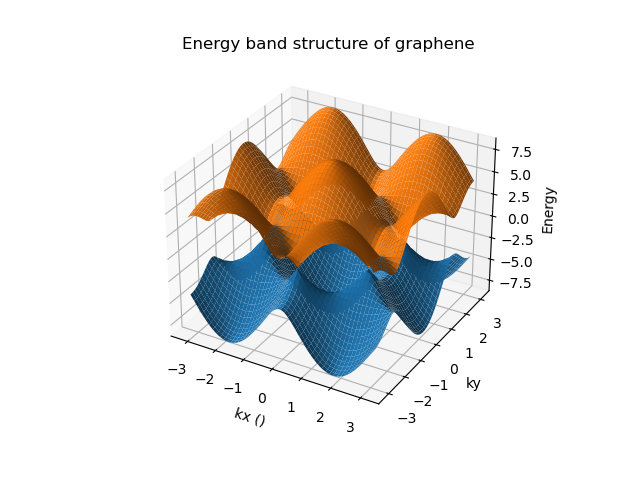

In [32]:
graphene_energy = np.linalg.eigh(graphene_hamiltonian)[0]
lower_band = graphene_energy[:, 0]
upper_band = graphene_energy[:, 1]
lower_band_matrix = lower_band.reshape((100, 100))
upper_band_matrix = upper_band.reshape((100, 100))

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, lower_band_matrix)
ax.plot_surface(X, Y, upper_band_matrix)
ax.set_xlabel('kx ()')
ax.set_ylabel('ky')
ax.set_zlabel('Energy')
ax.set_title('Energy band structure of graphene')
plt.show()

<IPython.core.display.Javascript object>


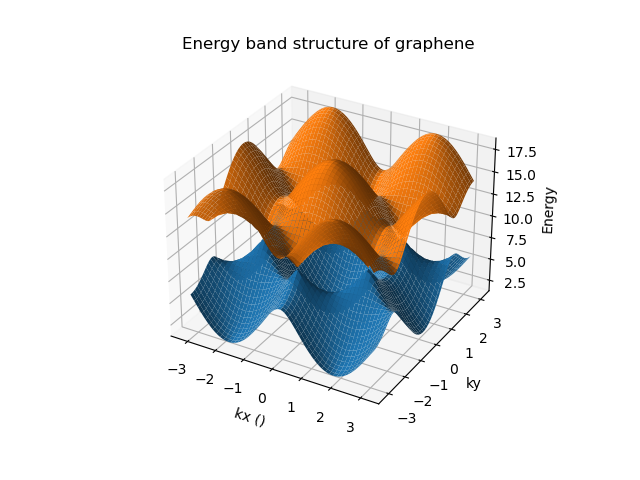

In [33]:
elementlist = [10., pza_hopping, pzb_hopping, 10.]
elementlist = element_filter(elementlist, size)
hamiltonian = twodim_constructmatrix1(elementlist, size)
energy = np.linalg.eigh(hamiltonian)[0]
lower_band = energy[:, 0]
upper_band = energy[:, 1]
lower_band_matrix = lower_band.reshape((100, 100))
upper_band_matrix = upper_band.reshape((100, 100))


fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, lower_band_matrix)
ax.plot_surface(X, Y, upper_band_matrix)
ax.set_xlabel('kx ()')
ax.set_ylabel('ky')
ax.set_zlabel('Energy')
ax.set_title('Energy band structure of graphene')
plt.show()

# Critical point graph for graphene

An easier way to see the graphene structure is by plotting the points along the symmetry lines. The symmetry points include K(hexagon corner), M(middle of the hexagonal edge) and the origin. The coordinate information of the K and M point based on our recpricol lattice vectors are given below:

K : $\dfrac{\pi}{a} (0, 4/3)$

M : $\dfrac{\pi}{a} (1/\sqrt{3}, 1)$

<IPython.core.display.Javascript object>


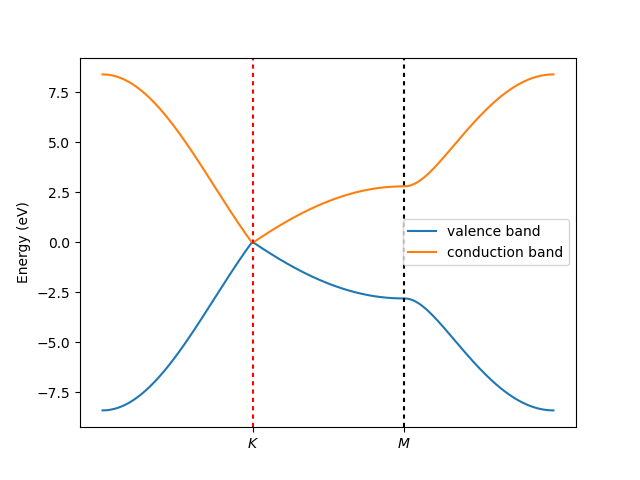

In [34]:
data_no = 100
bzb = np.pi/graphene_latcon
on_site = [GRAPHENE_ONSITE, GRAPHENE_ONSITE]
v2 = bzb * np.array([1/np.sqrt(3), 1])
v1 = bzb * np.array([0, 4/3])
data = critical_points_data(v1, v2, data_no)
eigenergy1, eigenergy2 = critical_points_energy(data, on_site, hexagonal_hopping)
plot_critical_data(eigenergy1, eigenergy2, data_no)

as shown in the above graph, the two bands touch each other at the K point (corners of the hexagonal brillouin zone), which in 3D can rotated to form a cone. These specific points are referred to as the dirac cones. This is intriguing for physicist because the spectrum as which the energy varies with the momentum of the molecule is **linear**. Normally, an electron's energy **varies quadratically with its momentum based on the non-relativistic formula** but here, the electron behaves similiarly to that of a **photon**. Here, we say electrons behaves as massless fermions and weird properties arises from relativistic quantum effects. This is also probably the reason which gives graphene amazing conductivity properties.

<IPython.core.display.Javascript object>


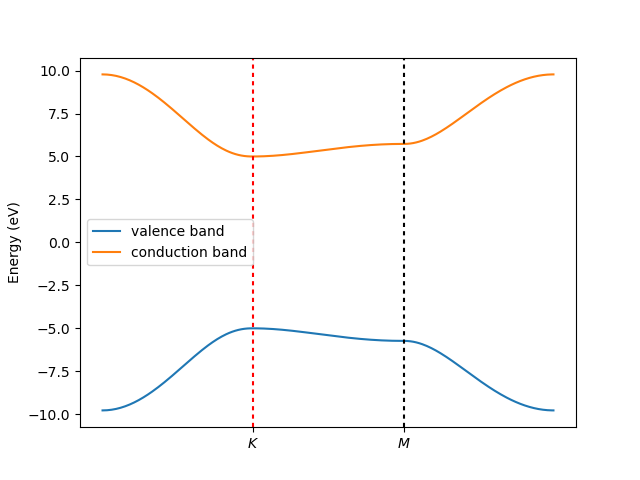

In [35]:
on_site = [5.0, -5.0]
data = critical_points_data(v1, v2, data_no)
eigenergy1, eigenergy2 = critical_points_energy(data, on_site, hexagonal_hopping)
plot_critical_data(eigenergy1, eigenergy2, data_no)

Here, in the case that $E$ is not zero, the two bands don't touch each other, which means the electrons need to overcome a specific band gap. An example of this is the material boron nitride.

# silicon (FCC lattice with two atoms in its basis)

A semiconductor material is now looked into with the use of tight-binding method. One popular semiconductor used widely in electronic industries is silicon, which has confirmed to have an experimental band gap of 1.12 eV. Silicon's structure is more complicated as it adopts a **face-centred cubic lattice with two silicon atoms in its basis**. By converting to its brillouin zone, it has a body-centred cubic lattice. Each silicon atom has **four valence electrons which can adopt all s, p orbitals**, meaning we must consider 8 distinct orbital states $\Psi_i$ in total. The hamiltonian matrix is then a 8 x 8 matrix. (insert reference). The nearest neighbor lattice vectors are respectfully [1]:

$\bf{a_1} = -a/2 (0, 1, 1)$

$\bf{a_2} = -a/2 (1, 0, 1)$

$\bf{a_3} = -a/2 (1, 1, 0)$

\begin{bmatrix}
E_s & V_{ss}g_0 & 0 & 0 & 0 & V_{sp}g_1 & V_{sp}g_2 & V_{sp}g_3\\
V_{ss}g_0 & E_s & -V_{sp}g_1^{\ast} & -V_{sp}g_2^{\ast} & -V_{sp}g_3^{\ast} & 0 & 0 & 0\\
0 & -V_{sp}g_1 & E_p & 0 & 0 & V_{xx}g_0 & V_{xy}g_3 & V_{xy}g_2\\
0 & -V_{sp}g_2 & 0 & E_p & 0 & V_{xy}g_3 & V_{xx}g_0 & V_{xy}g_1\\
0 & -V_{sp}g_3 & 0 & 0 & E_p & V_{xy}g_2 & V_{xy}g_1 & V_{xx}g_0\\
V_{sp}g_1^{\ast} & 0 & V_{xx}g_0^{\ast} & V_{xy}g_3^{\ast} & V_{xy}g_2^{\ast} & E_p & 0 & 0\\
V_{sp}g_2^{\ast} & 0 & V_{xy}g_3^{\ast} & V_{xx}g_0^{\ast} & V_{xy}g_1^{\ast} & 0 & E_p & 0\\
V_{sp}g_3^{\ast} & 0 & V_{xy}g_2^{\ast} & V_{xy}g_1^{\ast} & V_{xx}g_0^{\ast} & 0 & 0 & E_p\\
\end{bmatrix}

The V terms represent the different hopping potential energy between the types of orbital. More precise details can be found in chadi & cohen [2]. Here the g terms represent the phases for the nearest neighbours, where the calculation can be found inside the code as well.

In [36]:
# writing down informations of critical points in fcc
SI_LATCON = 1
data_no = 70
# nearest neighbours
SI_NV1 = np.array([1/2, 1/2, 0]) * SI_LATCON
SI_NV2 = np.array([0, 1/2, 1/2]) * SI_LATCON
SI_NV3 = np.array([1/2, 0, 1/2]) * SI_LATCON

# denotting the symmetry points
si_bzb = np.pi / SI_LATCON
X_point = np.array([0, 0, 2]) * si_bzb
L_point = np.array([1, 1, 1]) * si_bzb
W_point = np.array([1/2, 1/2, 2]) * si_bzb
K_point = np.array([3/2, 3/2, 0]) * si_bzb

# The path from L to the origin can be represented by using three linspaces between bzb and -bzb  
Z_PATH = np.linspace(0, si_bzb, data_no)
X_z = np.linspace(0, 2*si_bzb, data_no)

# ep - es = 7.20, reference taken from chadi and cohen
es = 0
ep = 7.20
ss_hop = -8.13
sp_hop = 5.88
xx_hop = 1.71
xy_hop = 7.51

# collecting the points along the path

In [37]:
# path goes from L - > origin -> X -> W -> origin

def si_hop_phase(kx, ky, kz):
    '''
    returns the phase of hopping for an electron in sillicon diamond structure based on their nearest neighbour
    '''
    dot1 = kx * SI_NV2[0] + ky * SI_NV2[1] + kz * SI_NV2[2]
    dot2 = kx * SI_NV3[0] + ky * SI_NV3[1] + kz * SI_NV3[2]
    dot3 = kx * SI_NV1[0] + ky * SI_NV1[1] + kz * SI_NV1[2]
    # The gs correspond to all possible hopping between different types of orbitals
    g1 = (1 + np.exp(1j * dot1) + np.exp(1j * dot2) + np.exp(1j * dot3))
    g2 = (1 + np.exp(1j * dot1) - np.exp(1j * dot2) - np.exp(1j * dot3))
    g3 = (1 - np.exp(1j * dot1) + np.exp(1j * dot2) - np.exp(1j * dot3))
    g4 = (1 - np.exp(1j * dot1) - np.exp(1j * dot2) + np.exp(1j * dot3))
    return [g1, g2, g3, g4]

def collect_paths():
    '''
    function that collects all the k path points between the critical points listed. The path goes from 
    L - > origin -> X -> W -> origin
    
    returns
    -------
    a list of the paths where each individual path is a (3,) nd.array listing all its cartesian coordinates. 
    The length is the number of data points inputted by the user
    '''
    bzcrit_2d1 = X_point[0:2]
    bzcrit_2d2 = W_point[0:2]
    bzcrit_2d3 = K_point[0:2]
    OXW_2d = critical_points_data(bzcrit_2d1, bzcrit_2d2, data_no)[0:2]
    KO_2d = critical_points_data(bzcrit_2d2, bzcrit_2d3, data_no)[-1]
    L_path = np.array([Z_PATH[::-1], Z_PATH[::-1], Z_PATH[::-1]])
    OX_path = np.array([OXW_2d[0][0], OXW_2d[0][1], X_z])
    z1 = np.ones((data_no)) * 2 * si_bzb
    z2 = np.zeros((data_no))
    XW_path = np.array([OXW_2d[1][0], OXW_2d[1][1], z1])
    WO_path = np.array([KO_2d[0], KO_2d[1], z2])
    path = [L_path, OX_path, XW_path, WO_path]
    return path

def f_factor(paths):
    '''
    calculates the associated phase factors as well its complex conjugate based on the path points between the
    critical points.
    
    returns
    -------
    f_k_factors: phase factor ((4,) nd.array where each element is a 1d array of the phase factor data)
    f_kc: complex conjugate of f_k_factors with the same data structure
    '''
    g1 = np.zeros((4, data_no), dtype = "complex128")
    g2 = np.zeros((4, data_no), dtype = "complex128")
    g3 = np.zeros((4, data_no), dtype = "complex128")
    g4 = np.zeros((4, data_no), dtype = "complex128")
    for index, xyz in enumerate(paths):
        phase = si_hop_phase(xyz[0], xyz[1], xyz[2])
        g1[index] = phase[0]
        g2[index] = phase[1]
        g3[index] = phase[2]
        g4[index] = phase[3]
    g1 = np.concatenate(g1)
    g2 = np.concatenate(g2)
    g3 = np.concatenate(g3)
    g4 = np.concatenate(g4)
    f_k_factors = np.array([g1, g2, g3, g4])
    #f_k_factors = np.concatenate(f_k_factors, axis = 1)
    f_kc = np.conjugate(f_k_factors)
    return f_k_factors, f_kc

In [38]:

def diamondstc_hamiltonian(f, fc):
    '''
    hamiltonian matrix for a diamond structure crystal (case example: silicon)

    Parameters
    ----------
    f : phase factors calculated by f_factor function
    fc : conjugate phase factors calculated by f_factor function
    '''
    ham = np.array([
        [es,        ss_hop * f[0],     0,          0,          0,     sp_hop*f[1], sp_hop*f[2], sp_hop*f[3]],
        [ss_hop*fc[0],     es,      -sp_hop*fc[1],   -sp_hop*fc[2],   -sp_hop*fc[3],     0,     0,          0],
        [0,          -sp_hop*f[1],     ep,         0,          0,     xx_hop*f[0], xy_hop*f[3], xy_hop*f[2]],
        [0,          -sp_hop*f[2],     0,          ep,         0,     xy_hop*f[3], xx_hop*f[0], xy_hop*f[1]],
        [0,          -sp_hop*f[3],     0,          0,          ep,    xy_hop*f[2], xy_hop*f[1], xx_hop*f[0]],
        [sp_hop*fc[1],      0,      xx_hop*fc[0],  xy_hop*fc[3],  xy_hop*fc[2],    ep,     0,         0],
        [sp_hop*fc[2],      0,      xy_hop*fc[3],  xx_hop*fc[0],  xy_hop*fc[1],    0,     ep,         0],
        [sp_hop*fc[3],      0,      xy_hop*fc[2],  xy_hop*fc[1],  xx_hop*fc[0],    0,      0,         ep]
    ])

    return ham

In [39]:
def diagonalise_diamondmatrix(size):
    # need to check if the written matrices are correct
    '''
    constructs a list of different matrixes and diagonalise them to obtain all possible eigenenergies in the brillouin
    zone
    '''
    f, fc = f_factor(collect_paths())
    print(len(f[1]))
    data_no = size
    diamond_matrix = np.array([diamondstc_hamiltonian(f[:, i], fc[:, i]) for i in range(data_no)])
    eigenergy = np.linalg.eigh(diamond_matrix)[0]
    return eigenergy

energy = diagonalise_diamondmatrix(280)
data = [energy[:, i] for i in range(8)]

280


<IPython.core.display.Javascript object>


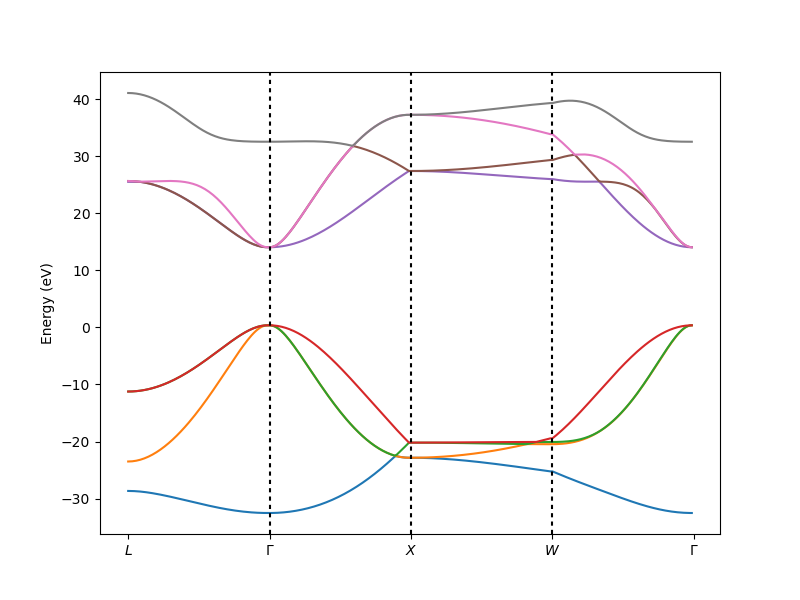

In [40]:
O_tick = data_no
X_tick = data_no * 2
W_tick = data_no * 3

# phase factor probably wrong, need to double check
    
x = np.arange(0, len(energy[:,0]), 1)
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)
#labels = ['sa', 'sb', 'pxa', 'pya', 'pza', 'pxb', 'pyb', 'pzb']
for eig_energy in data[0:8]:
    ax.plot(x, eig_energy)
ax.axvline(O_tick, dashes = [2,2], color = 'black')
ax.axvline(X_tick, dashes = [2,2], color = 'black')
ax.axvline(W_tick, dashes = [2,2], color = 'black')
ax.set_xticks([0, O_tick, X_tick, W_tick, len(x)])
ax.set_xticklabels(['$L$', '$\Gamma$', '$X$', '$W$', '$\Gamma$'])
ax.set_ylabel('Energy (eV)')
plt.show()

Here the band diagram looks somewhat similiar to the graphs shown in the original paper, though the scaling of the energy is off. The reported band gap should be near an order of 0, but here the band gap between the conduction band and valence band is ~10 eV. This suggests the code in scaling should be fixed. Other projects/ studies have revealed a more reasonable band gap of 3.92 eV. This is slightly inaccurate to the experimental value, possibly due to the fact that second nearest neighbour interaction has not been considered.

# Bonus: Spin - orbit coupling with Rashba hamiltonian (Still work in progress)

- applying a symmetry breaking field (E-field in the z direction) to split the electrons with different spins into two different energy bands. This is applied on a 2D electron gas (2DEG) such as graphene.
- first we consider a simple square lattice with a basis of one atom with a pz orbital

In [41]:
def rashba_SO(kx, ky):
    '''
    Calculates the off diagonal terms caused by the spin-orbit coupling in the rashba hamiltonian
    
    Parameters
    -----------
    SO_energy: a float representing the energy due to the spin-orbit interaction caused by a structural inversion asymmetry
    kx, ky: np.ndarray (meshgrid) that represents the kx, ky values
    
    Returns
    -------
    SO_offdiagterm: np.meshgrid for the off-diagonal term for all possible kx,ky values
    SO_offdiagtermc: complex conjugate of SO_offdiagterm
    '''
    SO_offdiagterm = SO_energy * (kx * (-1j) - ky)
    SO_offdiagtermc = SO_energy * (kx * (1j) - ky)
    return SO_offdiagterm, SO_offdiagtermc

# spin-orbit energy in ev (typical value is of order 10^-11)
# For simplicity sake, we shall take hbar and electron mass as 1. This is done for easier parametrization
# lattice constant is adjusted to keep the spin-splitting prominent
SO_energy = 5
lattice_const = 10


#k_range = np.linspace(-3e5, 3e5)
k_range = np.linspace(-lattice_const, lattice_const)
X, Y = np.meshgrid(k_range, k_range)
k_2 = X**2 + Y**2
offdiag = rashba_SO(X, Y)
on_site =  k_2 
# converting the value to eV

<IPython.core.display.Javascript object>


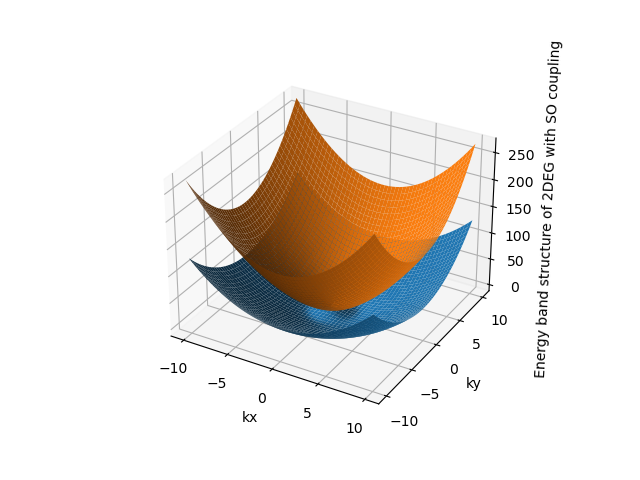

In [42]:
a = [on_site, offdiag[0], offdiag[1], on_site]
size = len(X) * len(Y)
# code in constructing the matrix and collecting the eigenenergy
rashba_data = element_filter(a, size)
hamiltonian = twodim_constructmatrix1(rashba_data, size)
eigenenergy = np.linalg.eigh(hamiltonian)[0]
band0 = eigenenergy[:, 0].reshape((len(X), len(Y)))
band1 = eigenenergy[:, 1].reshape((len(X), len(Y)))

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, band0)
ax.plot_surface(X, Y, band1)
ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('Energy band structure of 2DEG with SO coupling')
plt.show()

<IPython.core.display.Javascript object>


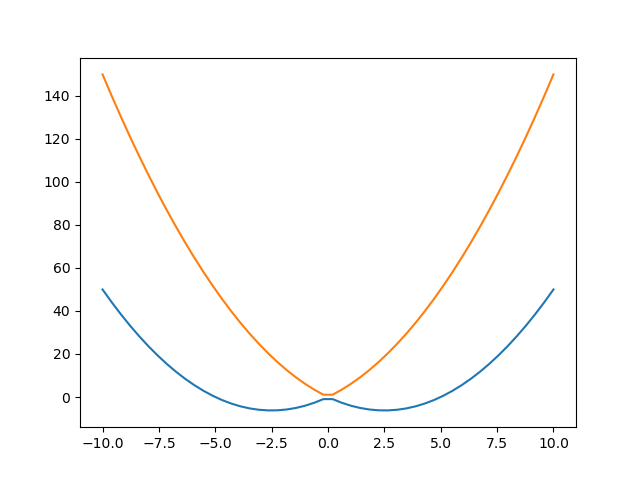

In [43]:
# looking at cross-section

X = np.linspace(0, 0)
Y = np.linspace(-lattice_const, lattice_const)
k_2 = X**2 + Y**2
offdiag = rashba_SO(X, Y)
on_site = k_2

a = [on_site, offdiag[0], offdiag[1], on_site]
size = len(X)
# code in constructing the matrix and collecting the eigenenergy
rashba_data = element_filter(a, size)
hamiltonian = twodim_constructmatrix1(rashba_data, size)
eigenenergy = np.linalg.eigh(hamiltonian)[0]

fig = plt.figure()
plt.plot(Y, eigenenergy[:,0])
plt.plot(Y, eigenenergy[:,1])
plt.show()


Note that the top band corresponds to a spin-up state, while the bottom band corresponds to a spin-down state

# References

[1] G. Pfanner, "Tight-binding calculation of the band structure of Silicon," downloaded July, 2022

[2] Chadi, D. J., and Marvin L. Cohen. "TIGHT-BINDING CALCULATIONS OF THE VALENCE BANDS OP DIAMOND AND ZINCBLENDE CRYSTALS." (1974).
